# Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi.exe -h

NVIDIA System Management Interface -- v425.25

NVSMI provides monitoring information for Tesla and select Quadro devices.
The data is presented in either a plain text or an XML format, via stdout or a file.
NVSMI also provides several management operations for changing the device state.

Note that the functionality of NVSMI is exposed through the NVML C-based
library. See the NVIDIA developer website for more information about NVML.
Python wrappers to NVML are also available.  The output of NVSMI is
not guaranteed to be backwards compatible; NVML and the bindings are backwards
compatible.

http://developer.nvidia.com/nvidia-management-library-nvml/
http://pypi.python.org/pypi/nvidia-ml-py/
Supported products:
- Full Support
    - All Tesla products, starting with the Kepler architecture
    - All Quadro products, starting with the Kepler architecture
    - All GRID products, starting with the Kepler architecture
    - GeForce Titan products, starting with the Kepler architecture
- Limi

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
"""Code Here
建立你的神經網路
"""
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()

W0905 23:19:50.242480  4084 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 23:19:50.264420  4084 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 23:19:50.268410  4084 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0905 23:20:04.456283  4084 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 23:20:04.464263  4084 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0905 23:20:09.580025  4084 deprecation.py:323] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0905 23:20:09.637868  4084 deprecation_wrapper.py:119] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.9483 - acc: 0.2956 - val_loss: 1.7795 - val_acc: 0.3517
Epoch 2/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.7185 - acc: 0.3867 - val_loss: 1.6675 - val_acc: 0.4016
Epoch 3/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.6173 - acc: 0.4224 - val_loss: 1.6762 - val_acc: 0.4006
Epoch 4/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.5712 - acc: 0.4402 - val_loss: 1.6001 - val_acc: 0.4250
Epoch 5/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.5076 - acc: 0.4609 - val_loss: 1.5486 - val_acc: 0.4384
Epoch 6/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.4742 - acc: 0.4732 - val_loss: 1.4989 - val_acc: 0.4669
Epoch 7/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.4448 - acc: 0.4862 - val_loss: 1.

50000/50000 [==============================] - 5s 101us/step - loss: 0.5567 - acc: 0.7992 - val_loss: 1.9061 - val_acc: 0.5087
Epoch 60/100
50000/50000 [==============================] - 5s 99us/step - loss: 0.5478 - acc: 0.8045 - val_loss: 1.9681 - val_acc: 0.5063
Epoch 61/100
50000/50000 [==============================] - 5s 102us/step - loss: 0.5392 - acc: 0.8075 - val_loss: 2.0067 - val_acc: 0.5047
Epoch 62/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.5291 - acc: 0.8089 - val_loss: 2.0455 - val_acc: 0.5031
Epoch 63/100
50000/50000 [==============================] - 6s 117us/step - loss: 0.5165 - acc: 0.8137 - val_loss: 2.0402 - val_acc: 0.5064
Epoch 64/100
50000/50000 [==============================] - 6s 110us/step - loss: 0.5120 - acc: 0.8173 - val_loss: 2.2251 - val_acc: 0.4929
Epoch 65/100
50000/50000 [==============================] - 5s 102us/step - loss: 0.5004 - acc: 0.8207 - val_loss: 2.1836 - val_acc: 0.5006
Epoch 66/100
50000/50000 [========

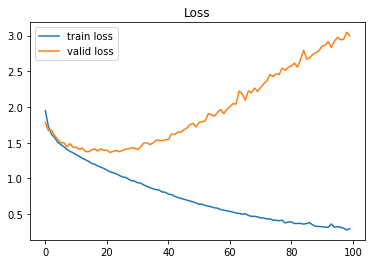

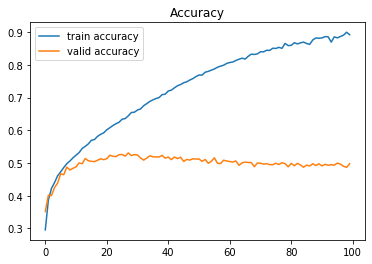

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()